this script plot the profile change of countries after moving internationally funded publications

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import os

In [2]:
raw_path="../../data/nf_folder/Data/DerivedData/Derived/cntry_author_full.csv"
filter_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_profile_filter_full.csv'
disgroup_path='../../data/nf_folder/Data/AdditionalData/discipline_classification.csv'
discode_path='../../data/nf_folder/Data/AdditionalData/discipline_code.csv'
pub_path='../../data/nf_folder/Data/DerivedData/CleanedRawData/pub.pkl'

In [21]:
raw_df=pd.read_csv(raw_path)
raw_df.head()

,cntry,year,dis,count
0,Afghanistan,2009,3,1
1,Afghanistan,2009,33,1
2,Afghanistan,2009,35,1
3,Afghanistan,2009,44,2
4,Afghanistan,2009,47,1


In [22]:
filter_df=pd.read_csv(filter_path)
filter_df.head()

,cntry,year,dis,count
0,Afghanistan,2009,3,1
1,Afghanistan,2009,33,1
2,Afghanistan,2009,44,2
3,Afghanistan,2009,47,1
4,Afghanistan,2009,48,1


In [5]:
disgroup=pd.read_csv(disgroup_path)
disgroup.head(2)

,abbrev,level_1,level_2,level_3
0,Fine Arts/Arch,Fine Arts & Architecture,Arts,Arts and Humanities
1,Perf. Arts,Performing Arts,Arts,Arts and Humanities


In [6]:
discode=pd.read_csv(discode_path)
discode.head(2)

,Code_Discipline,ESpecialite
0,1,Agricult & Food Science
1,2,Botany


In [7]:
dismeta=disgroup[['level_1','level_2']].merge(discode,left_on='level_1',right_on='ESpecialite')
dismeta=dismeta[['Code_Discipline','level_1','level_2']]
dismeta.columns=['dis','disname','level']

In [23]:
def dis2level(df,dismeta):
    df = df.merge(dismeta,on='dis',how='left')
    #df = df.groupby(['cntry','level'])['count'].sum().reset_index()
    df = df.groupby(['cntry','disname'])['count'].sum().reset_index()
    return df

In [24]:
raw_df=dis2level(raw_df,dismeta)
filter_df=dis2level(filter_df,dismeta)

In [26]:
meta=raw_df.merge(filter_df,on=['cntry','disname'],suffixes=('_raw', '_filter'),how='left')
meta=meta.fillna(0)
meta['p']=(meta['count_raw']-meta['count_filter'])/(meta['count_raw'])#calculate decreased ratio

In [28]:
meta[meta.cntry=='Chile'].sort_values(by='p',ascending=False).head(20)

,cntry,disname,count_raw,count_filter,p
2711,Chile,Astronomy & Astrophysics,7437,2090.0,0.718973
2768,Chile,Nuclear & Particle Physics,2277,761.0,0.665788
2791,Chile,Solid State Physics,224,83.0,0.629464
2764,Chile,Miscellaneous Physics,49,25.0,0.489796
2766,Chile,Nephrology,45,23.0,0.488889
2703,Chile,Allergy,23,12.0,0.478261
2701,Chile,Aerospace Technology,31,17.0,0.451613
2743,Chile,General Physics,1655,923.0,0.442296
2756,Chile,Meteorology & Atmospheric Science,239,136.0,0.430962
2751,Chile,Inorganic & Nuclear Chemistry,253,150.0,0.407115


In [38]:
dislist=['Biology','Biomedical Research','Clinical Medicine','Physics','Chemistry','Engineering and Technology',
        'Mathematics','Earth and Space']
meta=raw_df.merge(filter_df,on=['cntry','level'],suffixes=('_raw', '_filter'),how='left')
meta=meta.fillna(0)
meta['p']=(meta['count_raw']-meta['count_filter'])/(meta['count_raw'])#calculate decreased ratio
meta=meta.pivot(index='cntry',columns='level',values='p')
meta=meta[dislist]#order columns based on defined list
meta=meta.fillna(0)

In [39]:
def plot_radar(values,labels):
    fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))
    values += values[:1]
    theta = np.linspace(0, 2 * np.pi, len(values))
    ax.plot(theta, values)
    plt.ylim(0,1)
    plt.yticks([0.2,0.4,0.6,0.8,1])
    plt.thetagrids(range(0, 360, int(360/len(labels))),(labels))
    return fig, ax

In [69]:
labels=['Biology','Biomed.','Clinical Med.','Physics','Chemistry','Eng. & Tech.','Math','Earth & Space']
map_dir="../../data/nf_folder/Figs/profile_change"
for cntry,row in meta.iterrows():
    values=row.values.tolist()
    fig, ax=plot_radar(values,labels)
    plot_path=os.path.join(map_dir, cntry+ '.' + "pdf")
    plt.savefig(plot_path,bbox_inches='tight')
    plt.close()

In [14]:
pub_df=pd.read_pickle(pub_path)
pub_df.head()

,id,year,dis,type,author,funder,author_distinct,funder_distinct,funded,IntCol,cofund,intfund
0,60694041,2017,9,1,"[Canada, United States]","[United States, United States]","[United States, Canada]",[United States],1,1,0,0
1,48573156,2012,89,1,[France],Not-Funded,[France],Not-Funded,0,0,0,0
2,55323671,2015,89,1,"[France, Chile]","[Chile, Chile, Chile, Chile, Chile]","[Chile, France]",[Chile],1,1,0,0
3,57633115,2016,31,1,"[Switzerland, United States]",[Switzerland],"[Switzerland, United States]",[Switzerland],1,1,0,0
4,64831413,2018,99,1,[China],"[China, China, China, China, China, China]",[China],[China],1,0,0,0


In [16]:
pub_raw=pub_df.groupby(['dis']).size().reset_index(name='count')

In [22]:
pub_filter=pub_df[pub_df.intfund==0].groupby(['dis']).size().reset_index(name='count')

In [31]:
all_meta=pub_raw.merge(pub_filter,on='dis',suffixes=('_raw', '_filter'))
all_meta=all_meta.merge(dismeta,on='dis')

In [34]:
all_meta = all_meta.groupby(['level']).agg({'count_raw':'sum','count_filter':'sum'})

In [36]:
all_meta['p']=(all_meta['count_raw']-all_meta['count_filter'])/all_meta['count_raw']

(<Figure size 432x288 with 1 Axes>, <PolarAxesSubplot:>)

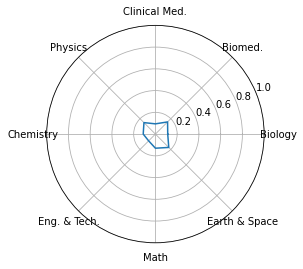

In [43]:
plot_radar(values,labels)

In [40]:
all_meta.loc['Biology','p']

0.11322614229230517

In [41]:
labels=['Biology','Biomed.','Clinical Med.','Physics','Chemistry','Eng. & Tech.','Math','Earth & Space']
values=[all_meta.loc[d,'p'] for d in dislist]

In [45]:
pub_filter['count'].sum()

11258888

In [46]:
pub_raw['count'].sum()

12759130

In [47]:
11258888/12759130

0.8824181586048578